In [1]:
def get_raw_data():
    raw_data = pd.read_csv("Pocket_gems_data.csv", low_memory = False)
    return(raw_data)
def remove_unwanted(raw_data):
    features_to_drop = ['u_udid', 'sum_iap_1_gems_2_ind', 'sum_iap_1_passes_2_ind', 'sum_iap_1_gems_1_ind', 
                        'sum_iap_1_passes_1_ind', 'sum_iap_1_gems_5_ind', 'sum_iap_1_passes_5_ind', 'sum_iap_1_gems_10_ind',
                        'sum_iap_1_passes_10_ind', 'sum_iap_1_gems_20_ind', 'sum_iap_value_pack_004_ind', 'sum_iap_value_pack_008_ind',
                        'sum_iap_1_gems_50_ind', 'sum_iap_value_pack_001_ind', 'sum_iap_value_pack_005_ind', 'sum_iap_value_pack_003_ind',
                        'sum_iap_value_pack_010_ind', 'sum_iap_1_gems_100_ind', 'sum_iap_value_pack_007_ind', 'sum_iap_value_pack_009_ind',
                        'sum_prod_type_gems_ind', 'sum_prod_type_chapterPasses_ind', 'sum_prod_type_valuePack_ind',
                        'install_dt_max_iaps_purchase_dt_diff', 'install_dt_min_iaps_purchase_dt_diff']
                        
    required_features = raw_data.drop(features_to_drop, axis = 1)
    return(required_features)

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn import preprocessing

import numpy as np
from sklearn.model_selection import train_test_split

# Import the raw data from the csv file
raw_data = get_raw_data()
required_features = remove_unwanted(raw_data)
required_features['install_date'] = pd.to_datetime(required_features['install_date'])
required_features['install_day_of_week'] = required_features['install_date'].dt.weekday_name
required_features = required_features.drop(['install_date'], axis = 1)

In [3]:
categorical = required_features.select_dtypes(include=['object'])
numeric = required_features.select_dtypes(exclude=['object'])

# create dummy variables
for name, values in categorical.items():
    dummies = pd.get_dummies(values.str.strip(), prefix = name, dummy_na=True)
    cleaned_data = pd.concat([numeric, dummies], axis=1)


In [4]:
# Creating a target variable
cleaned_data['total_rev']= cleaned_data['total_rev'].replace(np.nan, 0)
cleaned_data['potential_cust'] = cleaned_data['total_rev'].apply(lambda x: 1 if x > 0 else 0)
# Repaceling the vlaues 
cleaned_data['intsall_dt_max_spend_dt_diff']= cleaned_data['intsall_dt_max_spend_dt_diff'].replace(np.nan, -999)
cleaned_data['intsall_dt_min_spend_dt_diff']= cleaned_data['intsall_dt_min_spend_dt_diff'].replace(np.nan, 999)
cleaned_data['install_dt_max_session_dt_diff']= cleaned_data['install_dt_max_session_dt_diff'].replace(np.nan, -999)
cleaned_data['install_dt_min_session_dt_diff']= cleaned_data['install_dt_min_session_dt_diff'].replace(np.nan, 999)

In [5]:
cleaned_data.head(10)

,total_number_session,total_rev,spendevents_amount,intsall_dt_max_spend_dt_diff,intsall_dt_min_spend_dt_diff,install_dt_max_session_dt_diff,install_dt_min_session_dt_diff,SUM_spendtype_earnGemsCounter_ind,SUM_spendtype_IAP_ind,SUM_spendtype_premiumChoice_ind,...,SUM_spendtype_space_ind,install_day_of_week_Friday,install_day_of_week_Monday,install_day_of_week_Saturday,install_day_of_week_Sunday,install_day_of_week_Thursday,install_day_of_week_Tuesday,install_day_of_week_Wednesday,install_day_of_week_nan,potential_cust
0,233316.0,14210.0,65.0,60.0,3.0,60.0,0.0,36.0,74.0,71.0,...,8.0,0,0,1,0,0,0,0,0,1
1,58900.0,13011.0,-10.0,46.0,0.0,60.0,0.0,7.0,15.0,64.0,...,0.0,0,0,1,0,0,0,0,0,1
2,903.0,11199.0,-1477.0,8.0,0.0,8.0,0.0,8.0,6.0,39.0,...,0.0,0,0,0,1,0,0,0,0,1
3,6150.0,11198.0,-77.0,8.0,0.0,60.0,0.0,29.0,9.0,43.0,...,10.0,0,1,0,0,0,0,0,0,1
4,242356.0,11060.0,-36.0,41.0,0.0,49.0,0.0,13.0,80.0,101.0,...,1.0,0,1,0,0,0,0,0,0,1
5,3561.0,9940.0,-71.0,39.0,0.0,39.0,0.0,24.0,19.0,68.0,...,5.0,0,1,0,0,0,0,0,0,1
6,15806.0,9652.0,-85.0,9.0,0.0,56.0,0.0,3.0,4.0,23.0,...,0.0,0,0,0,0,0,0,1,0,1
7,53010.0,9097.0,-464.0,36.0,0.0,36.0,0.0,16.0,10.0,48.0,...,1.0,0,0,0,0,0,0,1,0,1
8,12668.0,9030.0,33.0,18.0,0.0,30.0,0.0,25.0,18.0,50.0,...,0.0,0,0,0,1,0,0,0,0,1
9,51437.0,8394.0,-197.0,25.0,1.0,60.0,0.0,1.0,2.0,28.0,...,0.0,0,1,0,0,0,0,0,0,1


In [7]:
#Imputing the missing values  
for name in cleaned_data:
    if pd.isnull(cleaned_data[name]).sum() > 0:
        cleaned_data["%s_mi" % (name)] = pd.isnull(cleaned_data[name])
        median = cleaned_data[name].median()
        print(median)
        cleaned_data[name] = cleaned_data[name].apply(lambda x: median if pd.isnull(x) else x)

In [8]:
y = cleaned_data['potential_cust']
X = cleaned_data.drop(['potential_cust', 'total_rev'], axis = 1)

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
feature_names = X.columns
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.443608)
2. feature 8 (0.230035)
3. feature 0 (0.103643)
4. feature 4 (0.053780)
5. feature 6 (0.039225)
6. feature 1 (0.038143)
7. feature 2 (0.038036)
8. feature 9 (0.012889)
9. feature 3 (0.011862)
10. feature 10 (0.007355)
11. feature 13 (0.001947)
12. feature 17 (0.001763)
13. feature 14 (0.001739)
14. feature 11 (0.001705)
15. feature 22 (0.001669)
16. feature 16 (0.001637)
17. feature 15 (0.001598)
18. feature 23 (0.001576)
19. feature 12 (0.001527)
20. feature 20 (0.001404)
21. feature 24 (0.001363)
22. feature 25 (0.001354)
23. feature 21 (0.001313)
24. feature 5 (0.000812)
25. feature 19 (0.000016)
26. feature 18 (0.000000)


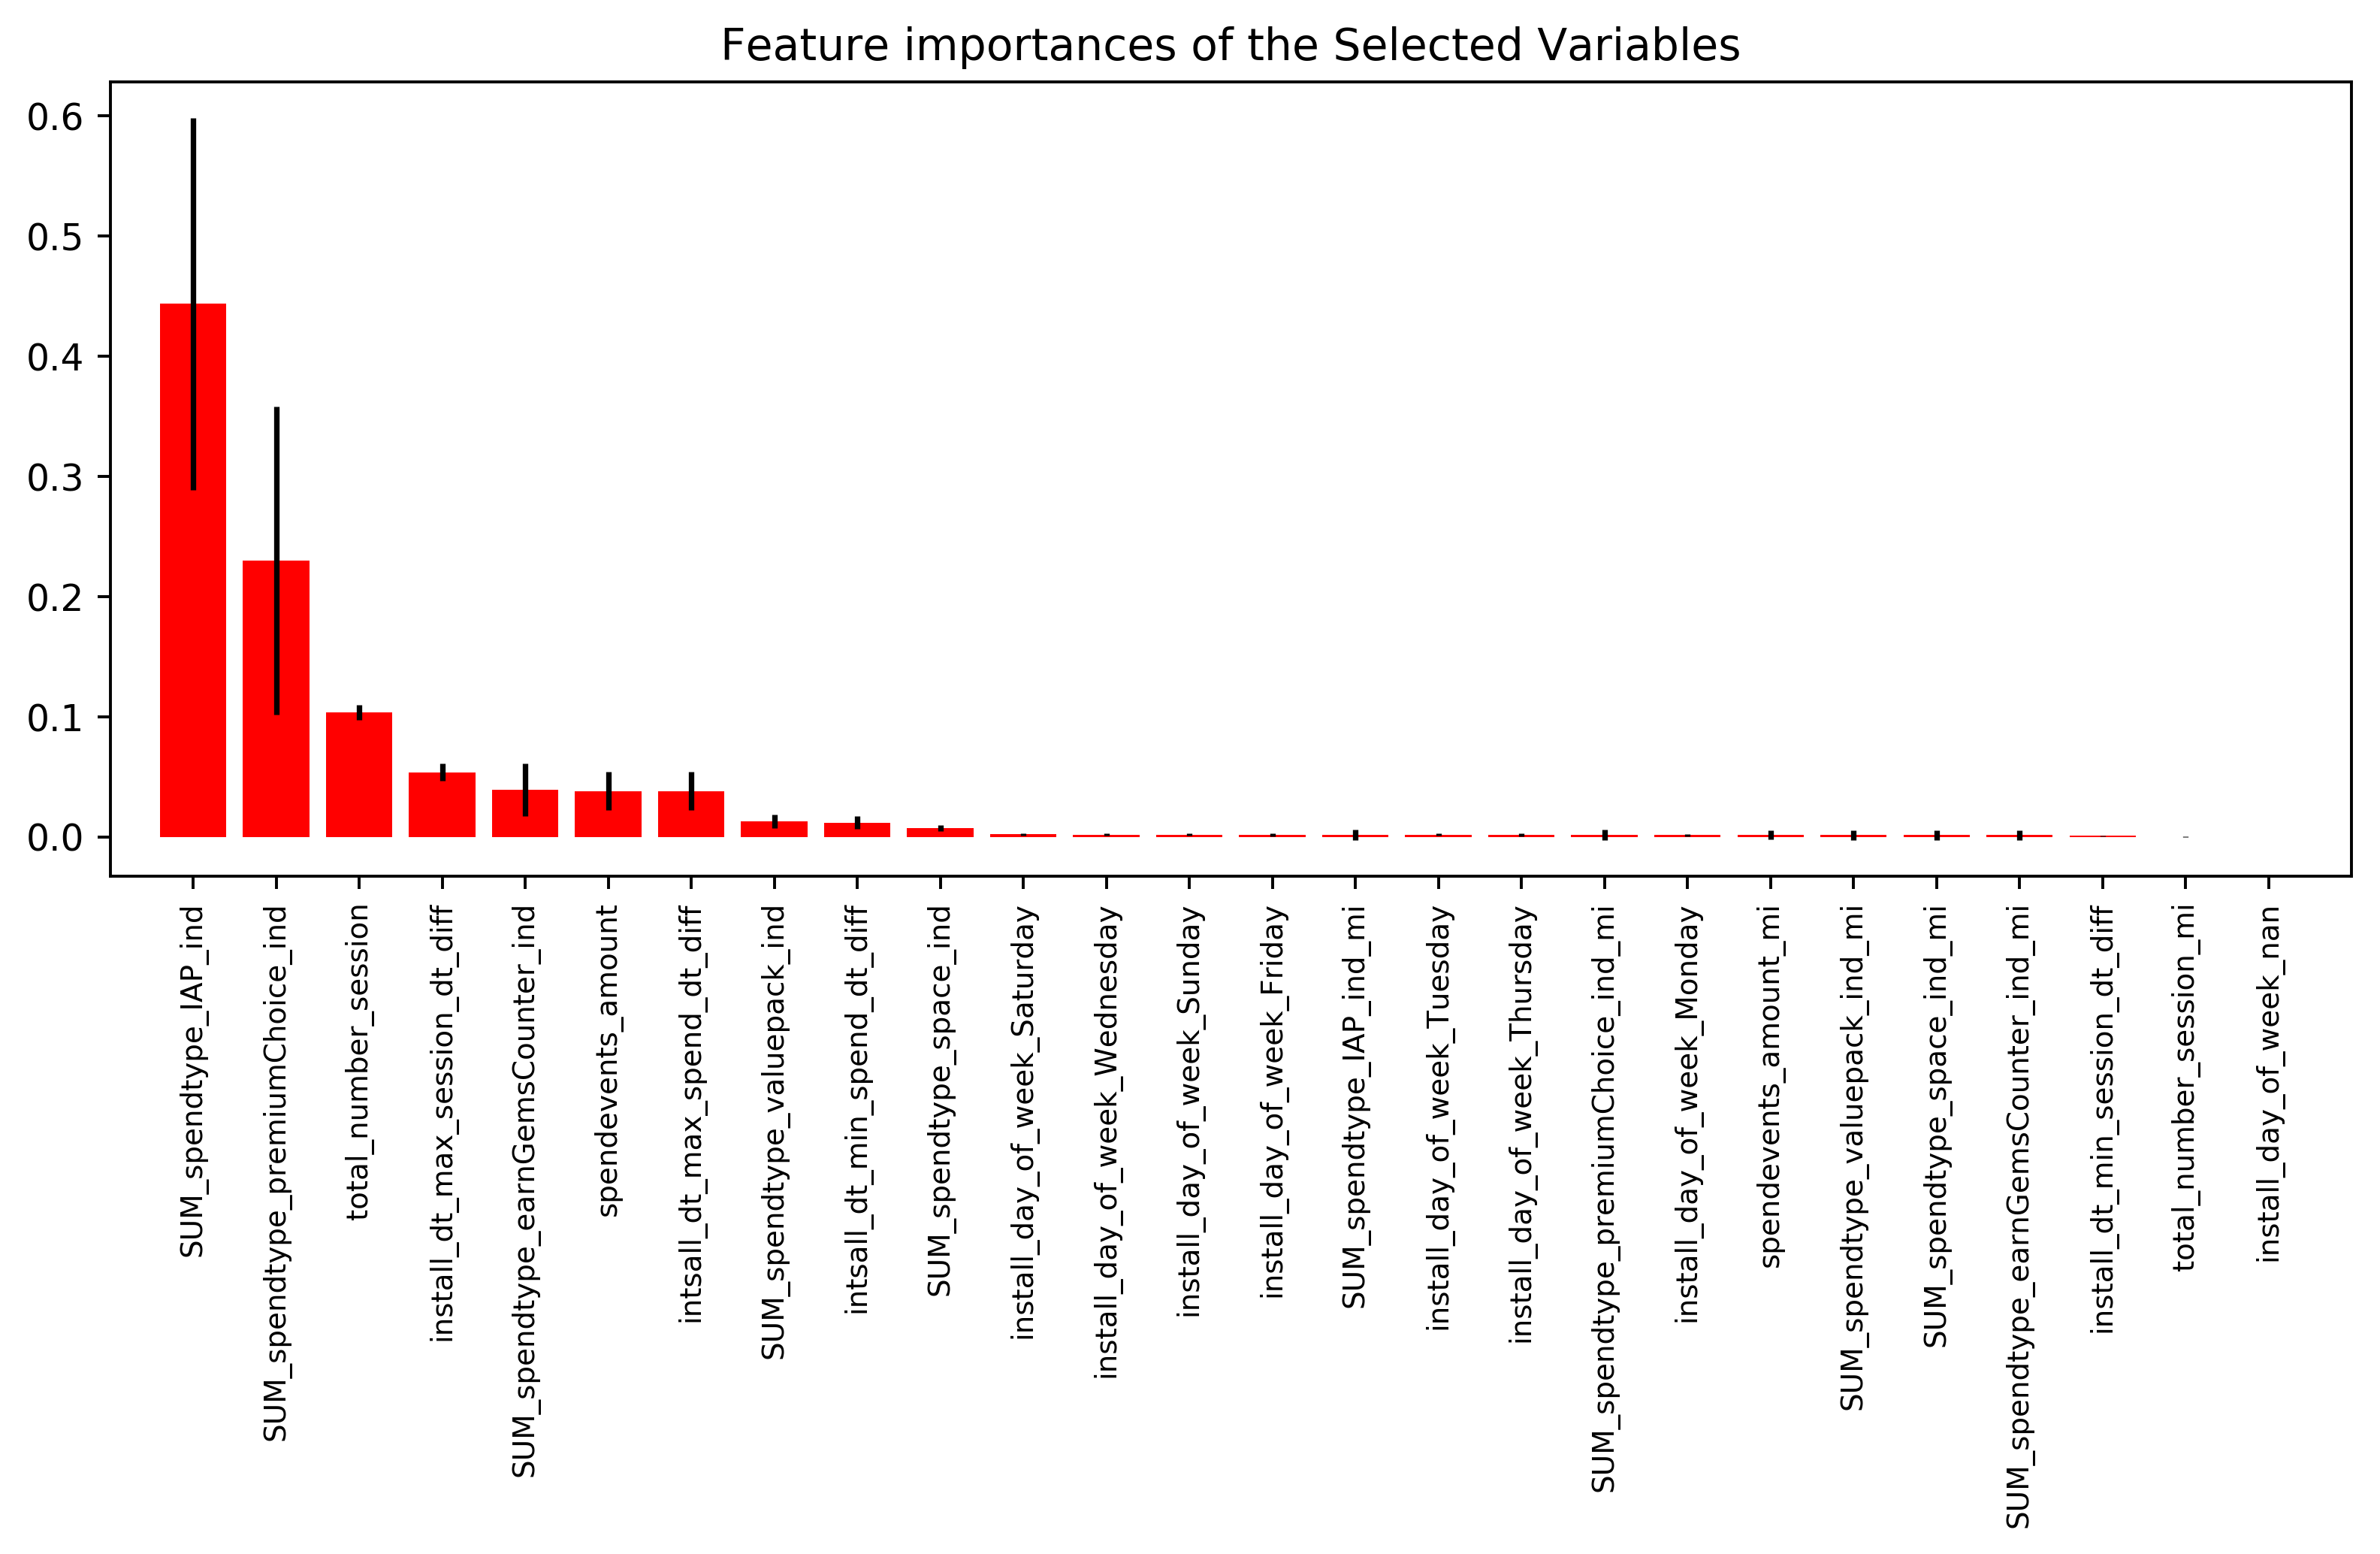

In [11]:
# Plot the feature importances of the forest
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 4), dpi=350)
plt.title("Feature importances of the Selected Variables")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices],rotation=90,size=8)
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
#Creating the holdout
X_data, X_holdout, y_data, y_holdout = train_test_split(X, y, test_size=0.1,stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,stratify = y_data)

In [13]:
#Decision Tree model
from sklearn import tree
dt = tree.DecisionTreeClassifier()

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', dt) ])


# Parameters for tuning the model
tree_depth = [5,6,7]
tree_min_samples_split = [5, 10, 20]
tree_min_samples_leaf = [5, 10, 15]
tree_max_leaf_nodes = [10,15,25]
#Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
optimized_dt = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__max_depth= tree_depth, 
                                              model__min_samples_split = tree_min_samples_split,
                                              model__min_samples_leaf = tree_min_samples_leaf,
                                              model__max_leaf_nodes = tree_max_leaf_nodes)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_dt.fit(X_train, y_train)

#Get the best estimator from the grid Search
print(optimized_dt.best_estimator_)
print(" The optimized_dt.best_score is : ", optimized_dt.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.2s


Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=15, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
 The optimized_dt.best_score is :  0.944965273674


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   25.8s finished


In [14]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=25, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best').fit(X,y)


In [15]:
dotfile = open("E:/Full time Permanent job prep/tree2.dot", 'w')
tree.export_graphviz(dt1, out_file = dotfile, feature_names = X_train.columns, class_names=True, proportion=True)
dotfile.close()

In [16]:
###############################        Gradient Boosted Tree Classifier Block        #######
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()


# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', gbc) ])

# Parameters for tuning the model
gbc_learning_rate = [0.1, 0.05, 0.02, 0.01]
gbc_max_depth = [4, 6]
gbc_min_samples_leaf = [3, 5, 9, 17]
gbm_max_features = [1.0, 0.3, 0.1]

#Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
optimized_gbc = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__learning_rate= gbc_learning_rate, 
                                              model__max_depth = gbc_max_depth,
                                              model__min_samples_leaf = gbc_min_samples_leaf,
                                              model__max_features = gbm_max_features)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_gbc.fit(X_train, y_train)

#Get the best estimator from the grid Search
print(optimized_gbc.best_estimator_)
print(" The optimized_gbc.best_score is :", optimized_gbc.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.6min finished


Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=4,
              max_features=1.0, max_leaf_nodes=None,
              min_impurity_...=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))])
 The optimized_gbc.best_score is : 0.950591576391


In [17]:
from sklearn.metrics import roc_auc_score
y_pred = optimized_gbc.predict_proba(X_test)[:, 1]
roc_on_test = roc_auc_score(y_test, y_pred)
print("The AUC on the test data(18% of the data) is ", roc_on_test)

The AUC on the test data(18% of the data) is  0.96220398762


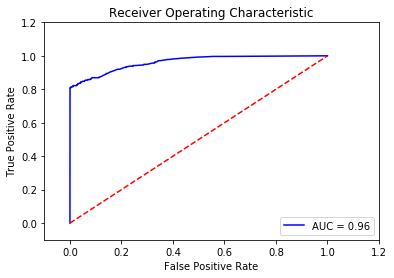

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
# predictions on holdout set
y_pred_hold_out = optimized_gbc.predict_proba(X_holdout)[:, 1]
roc_on_holdout= roc_auc_score(y_holdout, y_pred_hold_out)
print("The AUC on holdout(10% of data) is ", roc_on_holdout)
Y_df_pred_hold_out = pd.DataFrame(y_pred_hold_out)
Y_df_pred_hold_out.reset_index(drop=True, inplace=True)
y_holdout.reset_index(drop=True, inplace=True)
X_holdout.reset_index(drop=True, inplace=True)
df_merged = pd.concat([y_holdout,Y_df_pred_hold_out], axis=1)
df_merged.to_csv("predicted_values_10_percent_data.csv", encoding='utf-8', header=False,index=False)

The AUC on holdout(10% of data) is  0.965489885582
